In [ ]:
from os import chdir
from google.colab import drive

drive.mount("/content/drive", force_remount=True)
chdir("/content/drive/MyDrive/Projet")

Mounted at /content/drive


In [ ]:
import random
import pandas as pd
import torchvision.models as models
from PIL import Image

In [ ]:
# Load captions
PATH = "flickr8k/Images/"
captions = pd.read_csv("flickr8k/captions.txt")
captions

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...
40450,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,A man is rock climbing high in the air .
40452,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,A rock climber in a red shirt .


In [ ]:
# Add <start> and <end> tags
captions.caption = captions.caption.apply(lambda x: f"<start> {x} <end>")
captions

,image,caption
0,1000268201_693b08cb0e.jpg,<start> A child in a pink dress is climbing up...
1,1000268201_693b08cb0e.jpg,<start> A girl going into a wooden building . ...
2,1000268201_693b08cb0e.jpg,<start> A little girl climbing into a wooden p...
3,1000268201_693b08cb0e.jpg,<start> A little girl climbing the stairs to h...
4,1000268201_693b08cb0e.jpg,<start> A little girl in a pink dress going in...
...,...,...
40450,997722733_0cb5439472.jpg,<start> A man in a pink shirt climbs a rock fa...
40451,997722733_0cb5439472.jpg,<start> A man is rock climbing high in the air...
40452,997722733_0cb5439472.jpg,<start> A person in a red shirt climbing up a ...
40453,997722733_0cb5439472.jpg,<start> A rock climber in a red shirt . <end>


In [ ]:
# Shuffle images
images = captions.image.unique()
random.shuffle(images)
images

array(['881725588_efabbcd96a.jpg', '288177922_b889f2e1fe.jpg',
       '2774581025_81a3074e2e.jpg', ..., '3211029717_2affe6bbd5.jpg',
       '468608014_09fd20eb9b.jpg', '3440952969_608eb5e42b.jpg'],
      dtype=object)

In [ ]:
# Select a subset of images for training
N = 1000

train_images = images[:N]

In [ ]:
train_data = captions.loc[captions.image.isin(train_images)].reset_index(drop=True)
train_data

,image,caption
0,1020651753_06077ec457.jpg,<start> a black and white dog jumping in the a...
1,1020651753_06077ec457.jpg,<start> A black and white dog jumps up towards...
2,1020651753_06077ec457.jpg,<start> A dog leaps to catch a ball in a field...
3,1020651753_06077ec457.jpg,<start> A white dog is trying to catch a ball ...
4,1020651753_06077ec457.jpg,<start> The white dog is playing in a green fi...
...,...,...
4995,96985174_31d4c6f06d.jpg,<start> A hiker is walking along a path at the...
4996,96985174_31d4c6f06d.jpg,<start> A man walks near mountains . <end>
4997,96985174_31d4c6f06d.jpg,<start> A man with ski poles stands in front o...
4998,96985174_31d4c6f06d.jpg,<start> The person is walking in the mountains...


<start> a black and white dog jumping in the air to get a toy . <end>


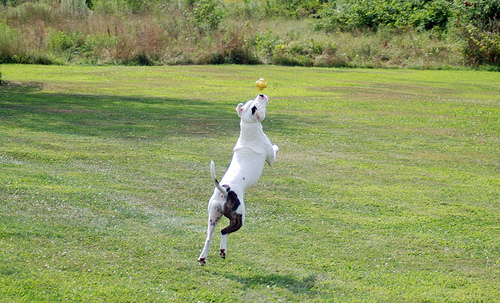

In [65]:
print(train_data.caption[0])
pic  = Image.open(PATH + train_data.image[0])
pic 

In [ ]:
vgg16 = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

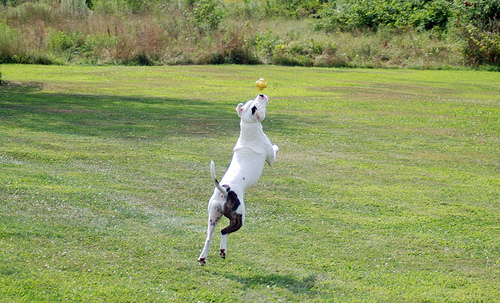

In [73]:
np.array(pic).shape
pic

In [74]:
pic2 = pic.resize((250,250))

In [82]:
# TODO ? normalize with magic numbers or batch norm ? question to prof

(250, 250, 3)

In [85]:
vgg16.

array([0.54608031, 0.59970284, 0.36948612])